<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [10]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Diferenciación numérica

**Meta:**  Dado una serie de $N+1$ puntos $(x_i, y_i)$ calcular la derivada de un orden determinado.

**Camino:** Aplicar derivada simple hacia adelante y atras y derivar de derivada centrada de la expresión de Taylor.

### Ejemplo 1:  Primera diferencia hacia adelante y atras

Usando dos puntos se puede obtener una expresión de la derivada basada en un polinomio de primer orden:

$$f'(x) \simeq \frac{y_1 - y_0}{x_1 - x_0} = \frac{y_1 - y_0}{\Delta x} = \frac{f(x_1) - f(x_0)}{\Delta x}$$

El error esta dado como:

$$R_1'(x) = -\Delta x \frac{f''(c)}{2}$$

Esto se puede aplicar hacia adelante y atras.  Para la diferencia hacias adelante se obtiene para $f'(x_n)$

$$f'(x_n) \approx D_1^+ = \frac{f(x_{n+1}) - f(x_n)}{\Delta x}$$

y para atras

$$f'(x_n) \approx D_1^- = \frac{f(x_n) - f(x_{n-1})}{\Delta x}$$

Estas fórmulas estan directamente relacionda con la definición de la derivada en $x_n$ en el límite $\Delta x \rightarrow 0$.

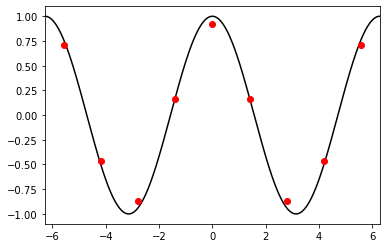

In [17]:
# Ilustración de la derivada numérica en comparación a a la analítica
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)


x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
# El intervalo entre 2*pi y -2*pi es divido en 20 segmentos en donde se evaluara la 
# derivada numérica
N = 6
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
# tamaño de paso
delta_x = x_hat[1] - x_hat[0]

# Calcula diferencia hacia adelante en un bucle
f_prime_hat = numpy.empty(x_hat.shape)
for i in range(N - 1):
    f_prime_hat[i] = (f(x_hat[i+1]) - f(x_hat[i])) / delta_x
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x

# En el límite del intervalo se usa la diferencia hacia atras
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat + 0.5 * delta_x, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))

plt.show()

### Derivación alternativa a través de la serie de Taylor

Expandenmos la función en el punto $x_n$ por una serie de Taylor:

$$f(x) = f(x_n) + (x - x_n) f'(x_n) + \frac{(x - x_n)^2}{2!} f''(x_n) + \frac{(x - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x - x_n)^4)$$

Usamos la serie de para obtener los valores $(x_{n+1}, f(x_{n+1})$ y $(x_{n-1}, f(x_{n-1})$:

$$\begin{aligned}
    f(x_{n+1}) &= f(x_n) + (x_{n+1} - x_n) f'(x_n) + \frac{(x_{n+1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n+1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n+1} - x_n)^4) \\
    &= f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)
\end{aligned}$$

and

$$f(x_{n-1}) = f(x_n) + (x_{n-1} - x_n) f'(x_n) + \frac{(x_{n-1} - x_n)^2}{2!} f''(x_n) + \frac{(x_{n-1} - x_n)^3}{3!} f'''(x_n) + \mathcal{O}((x_{n-1} - x_n)^4) $$

$$ = f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) $$

La primera derivada en $x_n$ la vamos a aproximar como una combinación lineal de una serie  de Taylor en los puntos $x_{n+1}$ y $x_{n-1}$ y el valor de la función en $x_n$:

$$
    f'(x_n) + R(x_n) = A f(x_{n+1}) + B f(x_n) + C f(x_{n-1})
$$

en donde $R(x_n)$ es el termino remanente.  Reemplazando las expresiones para $f(x_{n+1})$ y $f(x_{n-1})$ en la celda de arriba se obtiene

$$\begin{aligned}
    f'(x_n) + R(x_n) &= A \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & + B f(x_n) \\ 
    & + C \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right )
\end{aligned}$$

Queremos el orden del término remanente sea $R(x_n) = \mathcal{O}(\Delta x^2)$ por lo cual todos los terminos menores a este deben cancelarse salvo los que multiplican $f'(x_n)$ que deberían sumar 1.  Combinando los términos similares de  $f(x_n)$ obtenemos expresiones para $A$, $B$, y $C$ basados en que deseamos una derivada de $f'(x_n)$.  Para $n=0$ los terminos $A + B + C$ se hace 0 porque $f(x_n)$ debe cancerlarse.

$$\begin{aligned}
    f(x_n):&  &A + B + C &= 0 \\
    f'(x_n): & &A \Delta x - C \Delta x &= 1 \\
    f''(x_n): & &A \frac{\Delta x^2}{2} + C \frac{\Delta x^2}{2} &= 0
\end{aligned} $$

De la última ecuación se deduce $\Rightarrow A = -C$, que se utiliza en la segunda ecuación para obtener $A = \frac{1}{2 \Delta x}$ y $C = -\frac{1}{2 \Delta x}$ y la primera ecuación da $B = 0$.  El resultado para la derivada es y el error correspondiente es:

$$\begin{aligned}
    f'(x_n) + R(x_n) &= \quad \frac{1}{2 \Delta x} \left ( f(x_n) + \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) + \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right ) \\
    & \quad + 0 \cdot f(x_n) \\ 
    & \quad - \frac{1}{2 \Delta x} \left ( f(x_n) - \Delta x f'(x_n) + \frac{\Delta x^2}{2!} f''(x_n) - \frac{\Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4) \right ) \\
    &=  f'(x_n) + \frac{1}{2 \Delta x} \left ( \frac{2 \Delta x^3}{3!} f'''(x_n) + \mathcal{O}(\Delta x^4)\right )
\end{aligned}$$
y encontramos que 
$$
    R(x_n) = \frac{\Delta x^2}{3!} f'''(x_n) + \mathcal{O}(\Delta x^3) = \mathcal{O}(\Delta x^2)
$$

#### La derivada la podemos aproximar como sin considerar el residual...

$$f'(x_n) \simeq \frac{1}{2\Delta x} f(x_{n+1}) + 0 f(x_n) + -\frac{1}{2\Delta x} f(x_{n-1})$$

$$f'(x_n) \simeq  \frac{f(x_{n+1}) - f(x_{n-1})}{2 \Delta x} $$

que también podemos interpretar como el promedio de la derivada hacia adelante y atrás

$$f'(x_n) \simeq = \frac{D_1^+(f(x_n)) + D_1^-(f(x_n))}{2}$$

Es importante recordar que solo es válido cuando el espaciado $\Delta x$ es **constante entre los tres puntos**

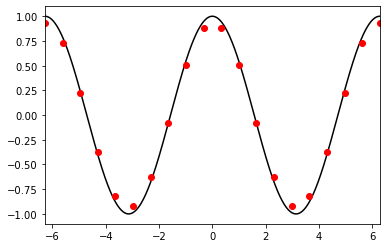

In [22]:
f = lambda x: numpy.sin(x)
f_prime = lambda x: numpy.cos(x)

# Use uniform discretization
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 20

x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Se calcula la diferencia centrada
f_prime_hat = numpy.empty(x_hat.shape)
f_prime_hat[1:-1] = (f(x_hat[2:]) - f(x_hat[:-2])) / (2 * delta_x)

# Para los límites se usa la diferencia hacia atras y adelante
f_prime_hat[0] = (f(x_hat[1]) - f(x_hat[0])) / delta_x     # hacia adelante en x_0
f_prime_hat[-1] = (f(x_hat[-1]) - f(x_hat[-2])) / delta_x  # hacia atras en x_N

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_prime(x), 'k')
axes.plot(x_hat, f_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
# axes.set_ylim((-1.1, 1.1))

plt.show()

### Ahora trabajaremos la segunda derivada centrada con la ecuación del libro ...

$f''(x) = \frac{f_{n+1} -2 f_{n} + f_{n-1}}{\Delta x^2}$

aquí también asumimos **intervalos $\Delta x$ iguales**

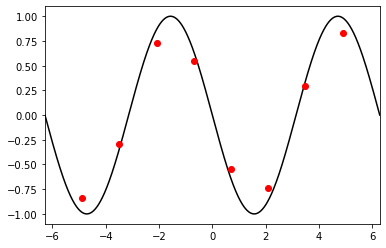

In [24]:
f = lambda x: numpy.sin(x)
#la segunda derivada del seno(x) es -seno(x)
f_dubl_prime = lambda x: -numpy.sin(x)

# Discretización uniforme
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)
N = 10
x_hat = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, N)
delta_x = x_hat[1] - x_hat[0]

# Compute derivative
f_dubl_prime_hat = numpy.empty(x_hat.shape)
f_dubl_prime_hat[1:-1] = (f(x_hat[2:]) -2.0 * f(x_hat[1:-1]) + f(x_hat[:-2])) / (delta_x**2)

# Use first-order differences for points at edge of domain
f_dubl_prime_hat[0] = (2.0 * f(x_hat[0]) - 5.0 * f(x_hat[1]) + 4.0 * f(x_hat[2]) - f(x_hat[3])) / delta_x**2
f_dubl_prime_hat[-1] = (2.0 * f(x_hat[-1]) - 5.0 * f(x_hat[-2]) + 4.0 * f(x_hat[-3]) - f(x_hat[-4])) / delta_x**2

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, f_dubl_prime(x), 'k')
axes.plot(x_hat, f_dubl_prime_hat, 'ro')
axes.set_xlim((x[0], x[-1]))
axes.set_ylim((-1.1, 1.1))

plt.show()